In [1]:
""" build up word associations in products sold """
import spacy
import textacy
import textacy.keyterms
import matplotlib.pyplot as plt
import pygraphviz as pgv
import networkx as nx
import pandas as pd
import numpy as np
en = textacy.load_spacy('en_core_web_sm', disable=('parser',))

In [4]:
# read in the product list
MAX_ITEMS = 100
products = ''
with open('/home/coreys/perm-usb/coreys/Documents/instacart/analyze_instacart_data/data/interim/products_sold.txt', 'r') as f:
    for idx, line in enumerate(f):
        if idx >= MAX_ITEMS:
            break
        products += line

In [49]:
processed_text = textacy.preprocess_text(products.replace("\n", ". "), lowercase=True)
processed_text[:50]

'chocolate sandwich cookies. all-seasons salt. robu'

In [12]:
doc = textacy.Doc(processed_text, lang=en)

In [29]:
word_freq = doc.to_bag_of_words(as_strings=True)
sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:5]

[('organic', 14), ('butter', 5), ('salt', 4), ('cheese', 4), ('chicken', 4)]

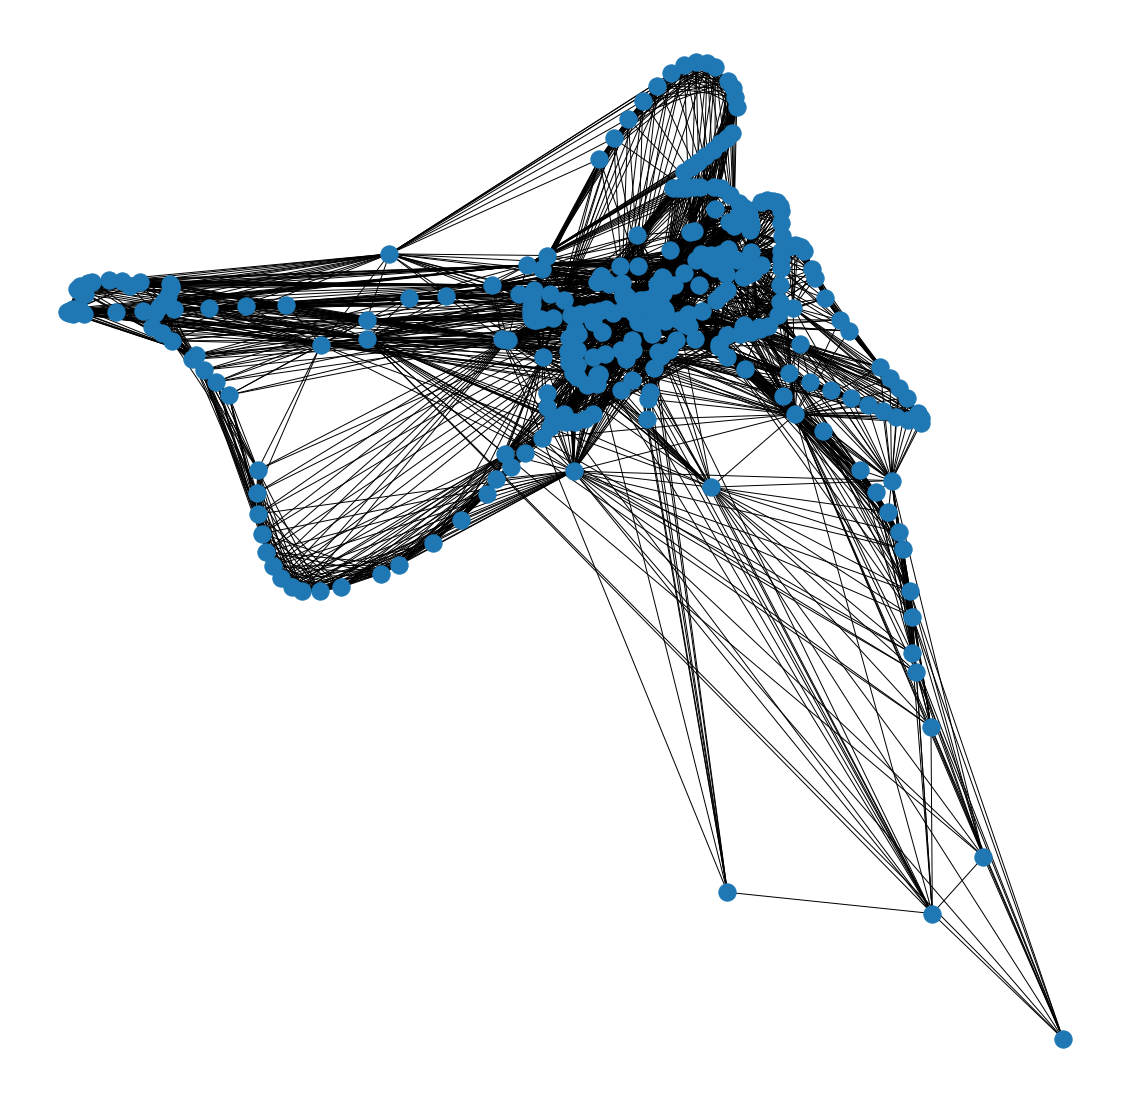

In [46]:
word_graph = doc.to_semantic_network()
f, ax = plt.subplots(figsize=(20,20))
nx.draw_spectral(word_graph)

In [19]:
textacy.keyterms.textrank(doc, normalize='lemma', n_keyterms=10)

[('organic', 0.027611298702388976),
 ('butter', 0.009957144207174808),
 ('tea', 0.009153918401952206),
 ('mix', 0.008971351846549857),
 ('cheese', 0.008846432294655995),
 ('sauce', 0.008537748998455948),
 ('apple', 0.008286093259533911),
 ('juice', 0.008172116331796549),
 ('chocolate', 0.007542413683260204),
 ('fresh', 0.007308160138941634)]

In [22]:
textacy.keyterms.sgrank(doc, ngrams=(1, 2, 3, 4, 5, 6), normalize='lower', n_keyterms=10)

[('chocolate', 0.07299647313695282),
 ('peanut butter', 0.04765119881000323),
 ('organic', 0.03770369225511835),
 ('sauce', 0.03627499042232096),
 ('salt', 0.030405245549419643),
 ('golden', 0.026315835890234448),
 ('juice', 0.023671635310494963),
 ('fresh', 0.022412982162015718),
 ('chile', 0.0204795111732289),
 ('water', 0.019359384634596605)]

In [ ]:
bot = doc.to_bag_of_terms(ngrams=(1, 2, 3), 
                          named_entities=True, 
                          weighting='count', 
                          as_strings=True)
sorted(bot.items(), key=lambda x: x[1], reverse=True)[:15]


In [48]:
nlp = spacy.load('en_core_web_md')

In [50]:
tokens = nlp('chocolate sandwich cookies')

In [67]:
for token in tokens:
    print(token.vector, token.vector.shape)

[ 0.082126   0.13322    0.26812   -0.27132   -0.20331   -0.038789
 -0.47407    0.13744    0.1592     1.0355    -0.75323    0.14699
 -0.36151   -0.18279    0.28236   -0.37526   -0.051815   1.4186
  0.33477   -0.13494    0.25769   -0.41589   -0.25455    0.19898
 -0.1368    -0.65211    0.2013    -0.023065   0.084196  -0.91461
 -0.033898   0.34027   -0.19642    0.22442    0.57132   -0.035195
 -0.22986   -0.35243    0.13237    0.091231   0.15327    0.21366
 -0.038077   0.021558   0.14834    0.55905   -0.45008    0.048419
  0.33794   -0.34324   -0.18607   -0.058341  -0.092921  -0.36434
  0.74187   -0.53805    0.094369  -0.027896  -0.2592    -0.36069
  0.27486   -0.18776    0.32999    0.69522   -0.58645   -0.26404
  0.41391    0.016249  -0.51923    0.31903    0.28141    0.49378
  0.2233    -0.60146    0.053433   0.31904   -0.071011  -0.038261
  0.11013   -0.40094   -0.19327    0.066172  -0.18772   -0.257
 -0.048537  -0.58571    1.1008     1.2123    -0.41827    0.043541
  0.5022     0.0095458 

In [80]:
# read in the product list
MAX_ITEMS = 500
word_vector_list = []
with open('/home/coreys/perm-usb/coreys/Documents/instacart/analyze_instacart_data/data/interim/products_sold.txt', 'r') as f:
    for idx, line in enumerate(f):
        if idx >= MAX_ITEMS:
            break
        processed_text = textacy.preprocess_text(line.replace("\n", ". "), lowercase=True)
        tokens = nlp(processed_text)
        word_vector_list.append(tokens.vector)

In [82]:
df = pd.DataFrame(word_vector_list)

In [83]:
import hdbscan

In [98]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=300, min_samples=300)

In [99]:
clusterer.fit(df)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(location=None),
    metric='euclidean', min_cluster_size=300, min_samples=300, p=None,
    prediction_data=False)

In [101]:
clusterer.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [102]:
from sklearn.cluster import AffinityPropagation

In [109]:
clustering = AffinityPropagation().fit_predict(df)

In [108]:
len(np.unique(clustering.labels_))

40

In [7]:
import itertools as it
len(list(it.combinations([1,2,3,4,5,6,7,8], 2)))

28